### Deliverable 1: Preprocessing the Data for a Neural Network

# New Section

In [14]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
url = "https://raw.githubusercontent.com/daappadurai/Deep_learning_challenge/main/charity_data.csv"
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [15]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [16]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [17]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [18]:
application_df["APPLICATION_TYPE"].nunique()

17

In [19]:
import collections
from numpy.lib.shape_base import apply_along_axis
# Determine the number of unique values in each column.
column_list = application_df.columns.values.tolist()
for column_name in column_list:
    print(column_name, len(application_df[column_name].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [20]:
# Look at APPLICATION_TYPE value counts for binning
appl_type = application_df["APPLICATION_TYPE"].value_counts()
appl_type


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [21]:
application_df["ASK_AMT"].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [22]:
application_df["ASK_AMT"].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [23]:
application_type = list(appl_type)
application_type

[27037, 1542, 1216, 1173, 1065, 737, 725, 528, 156, 66, 27, 16, 3, 3, 2, 2, 1]

<Axes: ylabel='Density'>

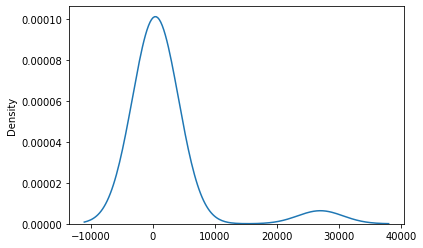

In [24]:
# Visualize the value counts of APPLICATION_TYPE
import seaborn as sns
sns.kdeplot(application_type)


In [25]:
# Determine which values to replace if counts are less than 500
application_count = application_df.APPLICATION_TYPE.value_counts()
replace_application = list(application_count[application_count<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()

classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<Axes: ylabel='Density'>

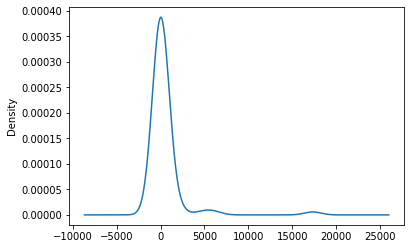

In [27]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()


In [28]:
# Determine which values to replace if counts are less than 1800
replace_class = list(classification_count[classification_count<1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [29]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [30]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.to_list()


In [31]:
#verifying that unique values less than 10
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

<ipython-input-33-fae914666e78>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  float64
 4   APPLICATION_TYPE_T10          34299 non-null  float64
 5   APPLICATION_TYPE_T19          34299 non-null  float64
 6   APPLICATION_TYPE_T3           34299 non-null  float64
 7   APPLICATION_TYPE_T4           34299 non-null  float64
 8   APPLICATION_TYPE_T5           34299 non-null  float64
 9   APPLICATION_TYPE_T6           34299 non-null  float64
 10  APPLICATION_TYPE_T7           34299 non-null  float64
 11  APPLICATION_TYPE_T8           34299 non-null  float64
 12  AFFILIATION_CompanySponsored  34299 non-null  float64
 13  A

In [35]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-35-f199198450cb>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Attempt #1
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 352       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model Attempt #1
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model Attempt #1
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6066 - accuracy: 0.6840
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5674 - accuracy: 0.7281
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5612 - accuracy: 0.7301
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.7314
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5571 - accuracy: 0.7305
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7299
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7304
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5525 - accuracy: 0.7309
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5520 - accura

In [ ]:
# Evaluate the model using the test data attempt 1
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5532 - accuracy: 0.7237 - 401ms/epoch - 1ms/step
Loss: 0.5532389283180237, Accuracy: 0.7237317562103271


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Attempt #2
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 15)                660       
                                                                 
 dense_8 (Dense)             (None, 5)                 80        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 746
Trainable params: 746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model Attempt #2
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model Attempt #2
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.6093 - accuracy: 0.6891
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5675 - accuracy: 0.7270
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5609 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7302
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7309
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7311
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7299
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7320
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5495 - accura

In [ ]:
# Evaluate the model using the test data attempt 2
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5546 - accuracy: 0.7268 - 402ms/epoch - 2ms/step
Loss: 0.5546330809593201, Accuracy: 0.7267638444900513


In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Attempt #3
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model Attempt #3
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Train the model Attempt #3
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.6110 - accuracy: 0.6946
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5632 - accuracy: 0.7267
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5581 - accuracy: 0.7296
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5553 - accuracy: 0.7311
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7319
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5508 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7321
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5503 - accuracy: 0.7332
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5498 - accura

In [40]:
# Evaluate the model using the test data attempt # 3
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5534 - accuracy: 0.7264 - 595ms/epoch - 2ms/step
Loss: 0.5534079074859619, Accuracy: 0.7264139652252197


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 54 Complete [00h 00m 43s]
val_accuracy: 0.7267638444900513

Best val_accuracy So Far: 0.727580189704895
Total elapsed time: 00h 16m 20s


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 3,
 'num_layers': 6,
 'units_0': 1,
 'units_1': 1,
 'units_2': 3,
 'units_3': 5,
 'units_4': 7,
 'units_5': 9,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5719 - accuracy: 0.7276 - 708ms/epoch - 3ms/step
Loss: 0.5718828439712524, Accuracy: 0.727580189704895
